<a href="https://colab.research.google.com/github/NitinNivin/Face_recognition-Basic/blob/main/Face_recognition-Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=210cc0efed03e35f1a8166e661d6d80b75f5e0714265097384937a54de715fe8
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:

!pip install opencv-python

In [ ]:
!mkdir unknown
!wget https://i.insider.com/5ddfa893fd9db26b8a4a2df7 -O unknown/1.jpg
!wget https://cdn-images-1.medium.com/max/1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg -O unknown/2.jpg
!wget https://media2.s-nbcnews.com/j/newscms/2017_46/2224911/171113-bill-gates-se-247p_043bd413c63b2a97abf11bfad747538d.fit-760w.jpg -O unknown/3.jpg
!wget https://specials-images.forbesimg.com/imageserve/1184274010/960x0.jpg -O unknown/4.jpg

--2024-09-29 07:30:31--  https://i.insider.com/5ddfa893fd9db26b8a4a2df7
Resolving i.insider.com (i.insider.com)... 151.101.2.217, 151.101.66.217, 151.101.130.217, ...
Connecting to i.insider.com (i.insider.com)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2324104 (2.2M) [image/png]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>]   2.22M  --.-KB/s    in 0.05s   

2024-09-29 07:30:31 (48.7 MB/s) - ‘unknown/1.jpg’ saved [2324104/2324104]

--2024-09-29 07:30:31--  https://cdn-images-1.medium.com/max/1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg
Resolving cdn-images-1.medium.com (cdn-images-1.medium.com)... 162.159.152.4, 162.159.153.4, 2606:4700:7::a29f:9804, ...
Connecting to cdn-images-1.medium.com (cdn-images-1.medium.com)|162.159.152.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /v2/resize:fit:1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg [following]
--2024-09-29 07:30:31--  https://cdn-image

Error: Unable to load image at known/.ipynb_checkpoints. Please check the path.
elon.jpg


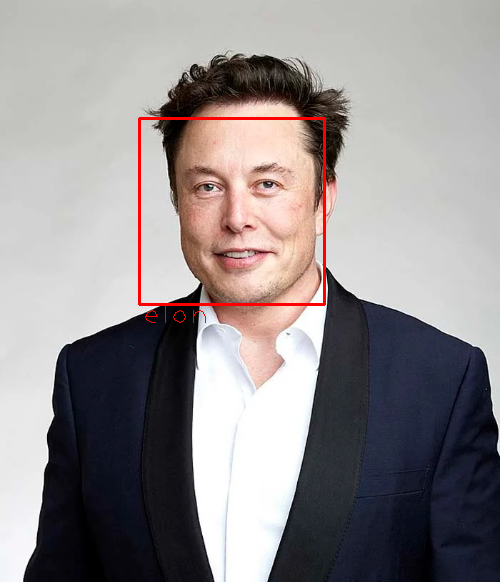

1.jpg


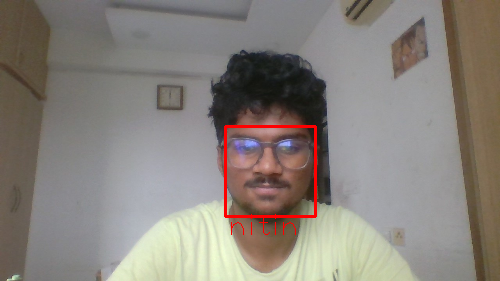

bill.jpg


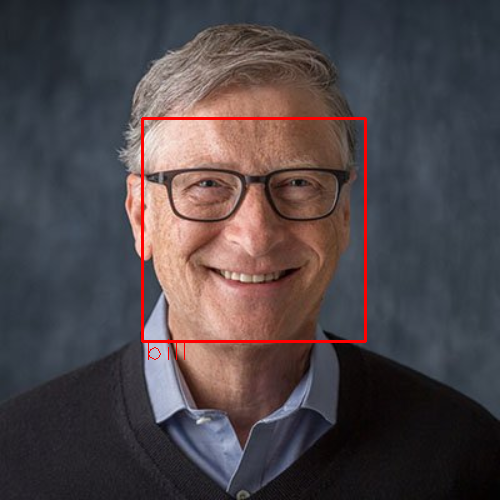

2.jpg


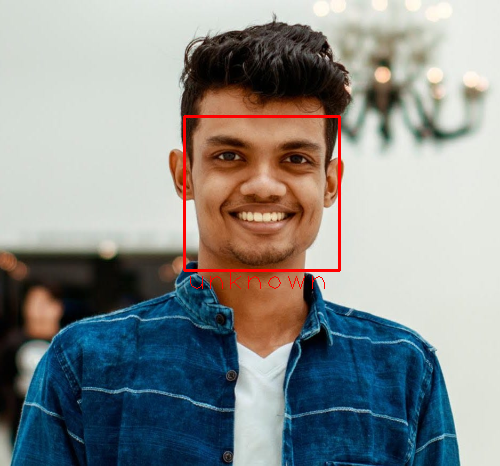

In [ ]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
    img = cv2.imread(path)
    if img is None:
        print(f"Error: Unable to load image at {path}. Please check the path.")
        return None


    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))


known_encodings = []
known_names = []
known_dir = 'known'
unknown_dir = 'unknown'


for file in os.listdir(known_dir):



    img = read_img(known_dir + '/' + file)
    if img is None:
      continue

    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

for file in os.listdir(unknown_dir):
    name=None
    print(file)
    img=read_img(unknown_dir+'/'+file)

    if img is None:
      continue
    img_enc=face_recognition.face_encodings(img)[0]
    result=face_recognition.compare_faces(known_encodings,img_enc)
    # print(face_recognition.face_distance(known_encodings,img_enc))
    for i in range(len(result)):
        if result[i]:
            name=known_names[i]
            (top,right,bottom,left)=face_recognition.face_locations(img)[0]
            cv2.rectangle(img,(left,top),(right,bottom),(0,0,255),2)
            cv2.putText(img,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN,2,(0,0,255),1)
            cv2_imshow(img)

    if name is None:
      name="unknown"
      (top,right,bottom,left)=face_recognition.face_locations(img)[0]
      cv2.rectangle(img,(left,top),(right,bottom),(0,0,255),2)
      cv2.putText(img,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN,2,(0,0,255),1)
      cv2_imshow(img)


    # print(result,name)


